In [1]:
# トイデータを使った PLTM の推論テスト

In [2]:
import sys
import numpy as np
np.set_printoptions(threshold=100, linewidth=200)
#np.set_printoptions(threshold=sys.maxsize, linewidth=200)

from pprint import pprint
from tqdm import tqdm

from test_utils import generate_pltm_toy_data, assign_phi, assign_theta, plot_phi, plot_theta

In [3]:
D = 1000 # 文書数
V = 100  # 語彙数
S = 10   # 補助情報数
K = 5    # トピック数
alpha = 1.0  # トピック分布の共役事前分布のパラメータ
beta  = 1.0  # 語彙分布の共役事前分布のパラメータ

generate_pltm_toy_data(D, V, S, K, alpha=alpha, beta=beta, seed=123)

generating...


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 551.39it/s]


{'K': 5,
 'alpha': 1.0,
 'beta': 1.0,
 'phi_kv': array([[0.00841513, 0.00275464, 0.01963053, ..., 0.0071981 , 0.02979759, 0.0044797 ],
        [0.00442285, 0.01253262, 0.00665678, ..., 0.01118651, 0.00460077, 0.00208758],
        [0.01943387, 0.00214249, 0.00821572, ..., 0.01369453, 0.00905449, 0.01190491],
        [0.00883959, 0.01180355, 0.00389859, ..., 0.01052288, 0.01468546, 0.00967758],
        [0.02435371, 0.04021486, 0.00043271, ..., 0.00216879, 0.01245777, 0.01000887]]),
 'phi_ks': array([[1.70737965e-01, 4.57181042e-03, 1.27964230e-02, 1.26705811e-01, 2.52237590e-02, 1.45013269e-04, 2.20140042e-01, 3.61931727e-01, 3.42792824e-02, 4.34681673e-02],
        [4.50296224e-02, 1.27356507e-01, 6.90894437e-02, 9.88710943e-03, 1.22367462e-01, 1.82333672e-01, 3.45324194e-01, 6.36749799e-02, 1.08903586e-02, 2.40466513e-02],
        [7.56700536e-02, 1.40912824e-01, 1.28221424e-01, 1.87154828e-01, 9.33035620e-02, 2.16856342e-01, 2.95785188e-02, 4.53201295e-02, 1.58469205e-02, 6.71353970e-

In [4]:
!head -n5 ./pltm.test.txt

75 61 85 65 91 68 78 55 20 66 50 6 11 27 6 24 80 14 15 57 41 85 69 56 42 50 64 60 52 74 65 7 80 68 18 40 51 42 12 43 19 98 65 62 80 42 10 90 29 1 96 9 55 57 2 80 9 52 73 96 36 18 48 15 89 98 16 73 68 64 58 35 28 77 93 20 32 98 69 7 61 36 89 91 85 92 24 0 4 96 91 66 42 57 1 12 49 8 26 27 68 49 62 96 57 51 78 66 12 16 29 22 27 73 55
50 87 37 24 57 7 21 7 12 8 59 59 96 81 96 86 59 60 23 42 32 85 1 46 6 37 35 7 6 20 23 81 10 62 92 50 7 64 33 97 99 40 57 83 81 98 40 15 84 33 60 68 38 13 84 34 88 1 56 18 44 39 73 80 51 69 1 32 73 0 68 6 57 12 96 44 93 1 73 37 39 88 43 57 9 96 23 26 31 66 37 8 86 40 57 21 62 88 1 85 50 87 27 8 83 51 26 11 62 98 46 4 57 57 18 39 16 27 82 80 57 31 60 41 41 90 8 39 93 9 51 70 54 54 39 34 86 3 1 23 42 40 27 60 78 18 85 98 7 30 2 57 97 13 55 77 19 68 99 68 25 73 39 15 33 41 18 57 65 22 15 18 13 87 10 35 34 28 24 57 60 15 42 51 57 18 8 90 18 0 10 74 40
65 23 91 41 39 11 50 4 7 86 97 64 88 78 49 80 9 82 8 68 20 57 7 97 41 51 69 57 40 93 60 82 55 36 69 27 65 54 7 23 

In [5]:
!head -n5 ./pltm.test.support.txt

4 8
9 4 5 5
3 6
8 7 2 0
3 1 5


In [6]:
params = np.load("./pltm.test.params.npz")
_, true_alpha, true_beta, true_phi_kv, true_phi_ks, true_theta = (
    int(params["K"]),
    float(params["alpha"]),
    float(params["beta"]),
    params["phi_kv"],
    params["phi_ks"],
    params["theta"]
)

In [7]:
from cytm.pltm import PLTM

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

model = PLTM(
    ("./pltm.test.txt", "./pltm.test.word2id.txt"),
    ("./pltm.test.support.txt", "./pltm.test.support.word2id.txt"),
    K=5,
    alpha=1.0,
    beta=1.0,
    n_iter=1000
)

2025-04-16 01:35:02,672 : INFO : Corpus: 1000 docs, 149728 words, 100 vocab.
2025-04-16 01:35:02,672 : INFO : Side Information[0]: 3019 words, 10 vocab.
2025-04-16 01:35:02,673 : INFO : Number of topics: 5
2025-04-16 01:35:02,673 : INFO : alpha: 1.000
2025-04-16 01:35:02,673 : INFO : beta: 1.000
2025-04-16 01:35:02,693 : INFO : Running Gibbs sampling inference
2025-04-16 01:35:02,693 : INFO : Number of sampling iterations: 1000
2025-04-16 01:35:33,353 : INFO : Sampling completed! Elapsed 30.6566 sec ppl=261.21000:30<00:00, 33.19it/s, ppl=260.131]
100%|██████████████████████████████████████████████████████████████████| 1000/1000 [00:30<00:00, 32.62it/s, ppl=260.131]


In [8]:
# 推定分布を KL ダイバージェンスをヒントに真の分布に割り当て（マッピング）
assign_kv, phi_kv = assign_phi(true_phi_kv, model.phi[0].T)


Topic Matching (True -> Estimated):
True Topic 0 matched with Estimated Topic 3 | KL Divergence: 0.0371
True Topic 1 matched with Estimated Topic 0 | KL Divergence: 0.0241
True Topic 2 matched with Estimated Topic 2 | KL Divergence: 0.0365
True Topic 3 matched with Estimated Topic 1 | KL Divergence: 0.0290
True Topic 4 matched with Estimated Topic 4 | KL Divergence: 0.0290

Mean KL Divergence after optimal topic matching: 0.0311


In [9]:
# 推定分布を KL ダイバージェンスをヒントに真の分布に割り当て（マッピング）
assign_ks, phi_ks = assign_phi(true_phi_ks, model.phi[1].T)


Topic Matching (True -> Estimated):
True Topic 0 matched with Estimated Topic 3 | KL Divergence: 0.1303
True Topic 1 matched with Estimated Topic 0 | KL Divergence: 0.0543
True Topic 2 matched with Estimated Topic 2 | KL Divergence: 0.0691
True Topic 3 matched with Estimated Topic 1 | KL Divergence: 0.0221
True Topic 4 matched with Estimated Topic 4 | KL Divergence: 0.0444

Mean KL Divergence after optimal topic matching: 0.0640


In [10]:
# 割り当てられたトピック番号をつかってトピック分布を更新
assert assign_kv == assign_ks
theta = assign_theta(model.theta, assign_kv)

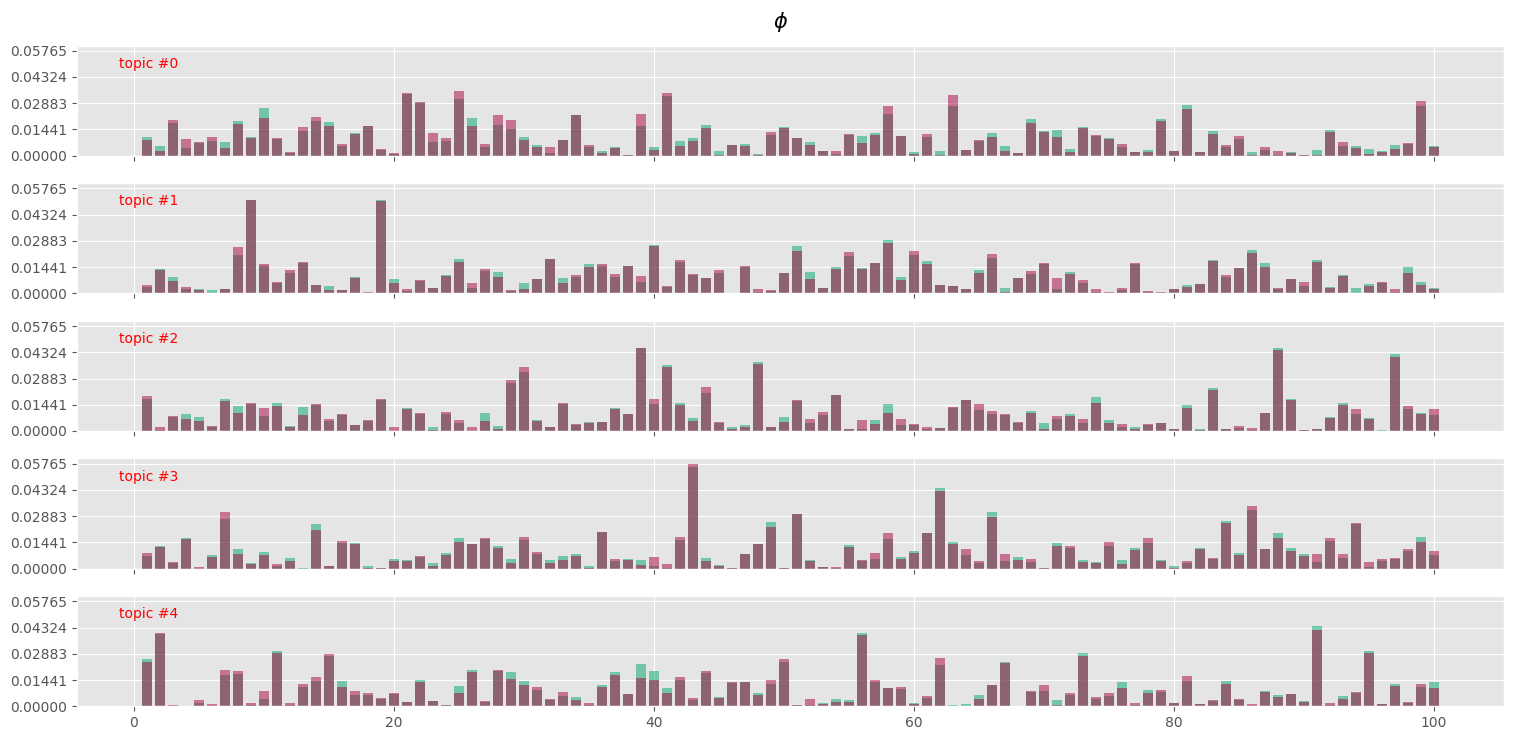

In [11]:
# 真の分布と推定分布の比較（語彙分布）
plot_phi(phi_kv, true_phi_kv, n_rows=5)

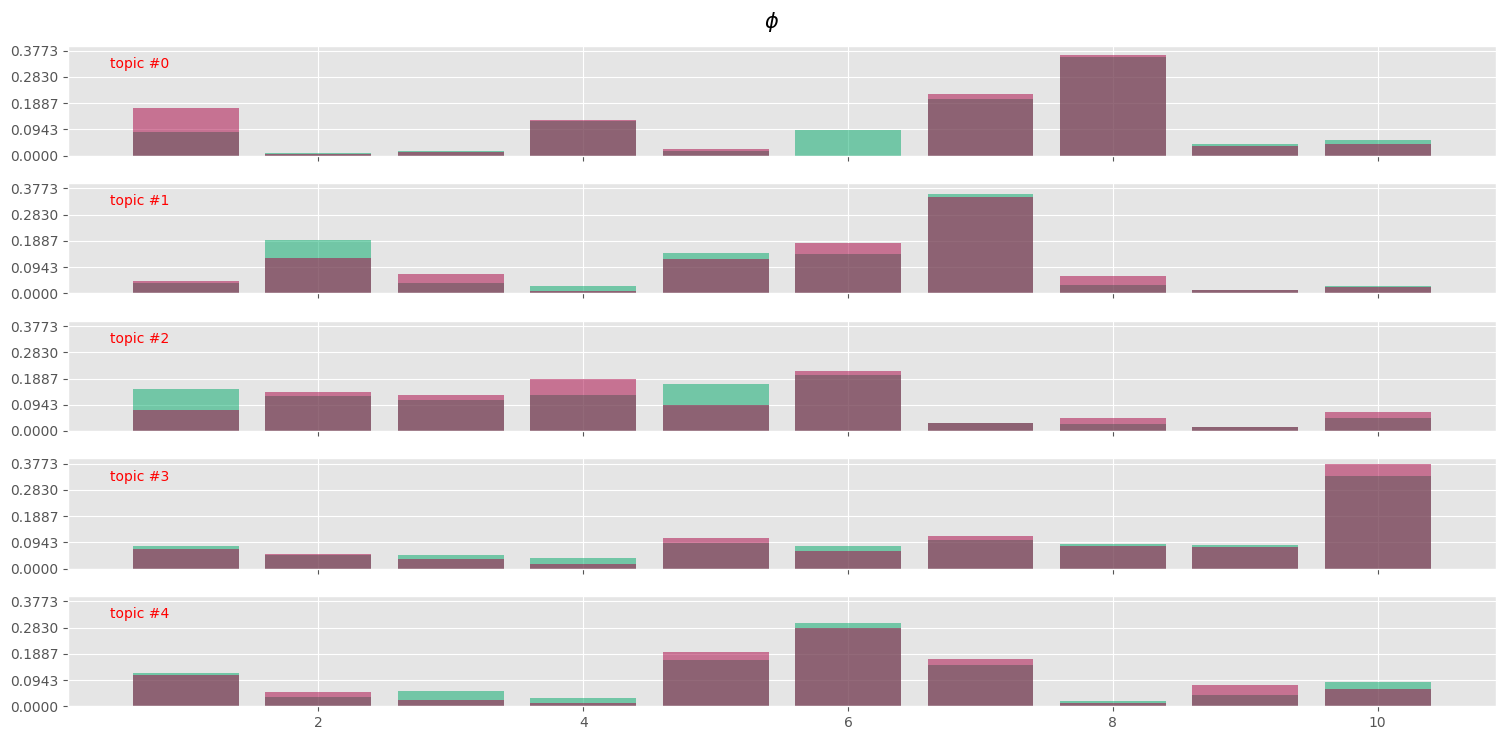

In [12]:
# 真の分布と推定分布の比較（補助情報分布）
plot_phi(phi_ks, true_phi_ks, n_rows=5)

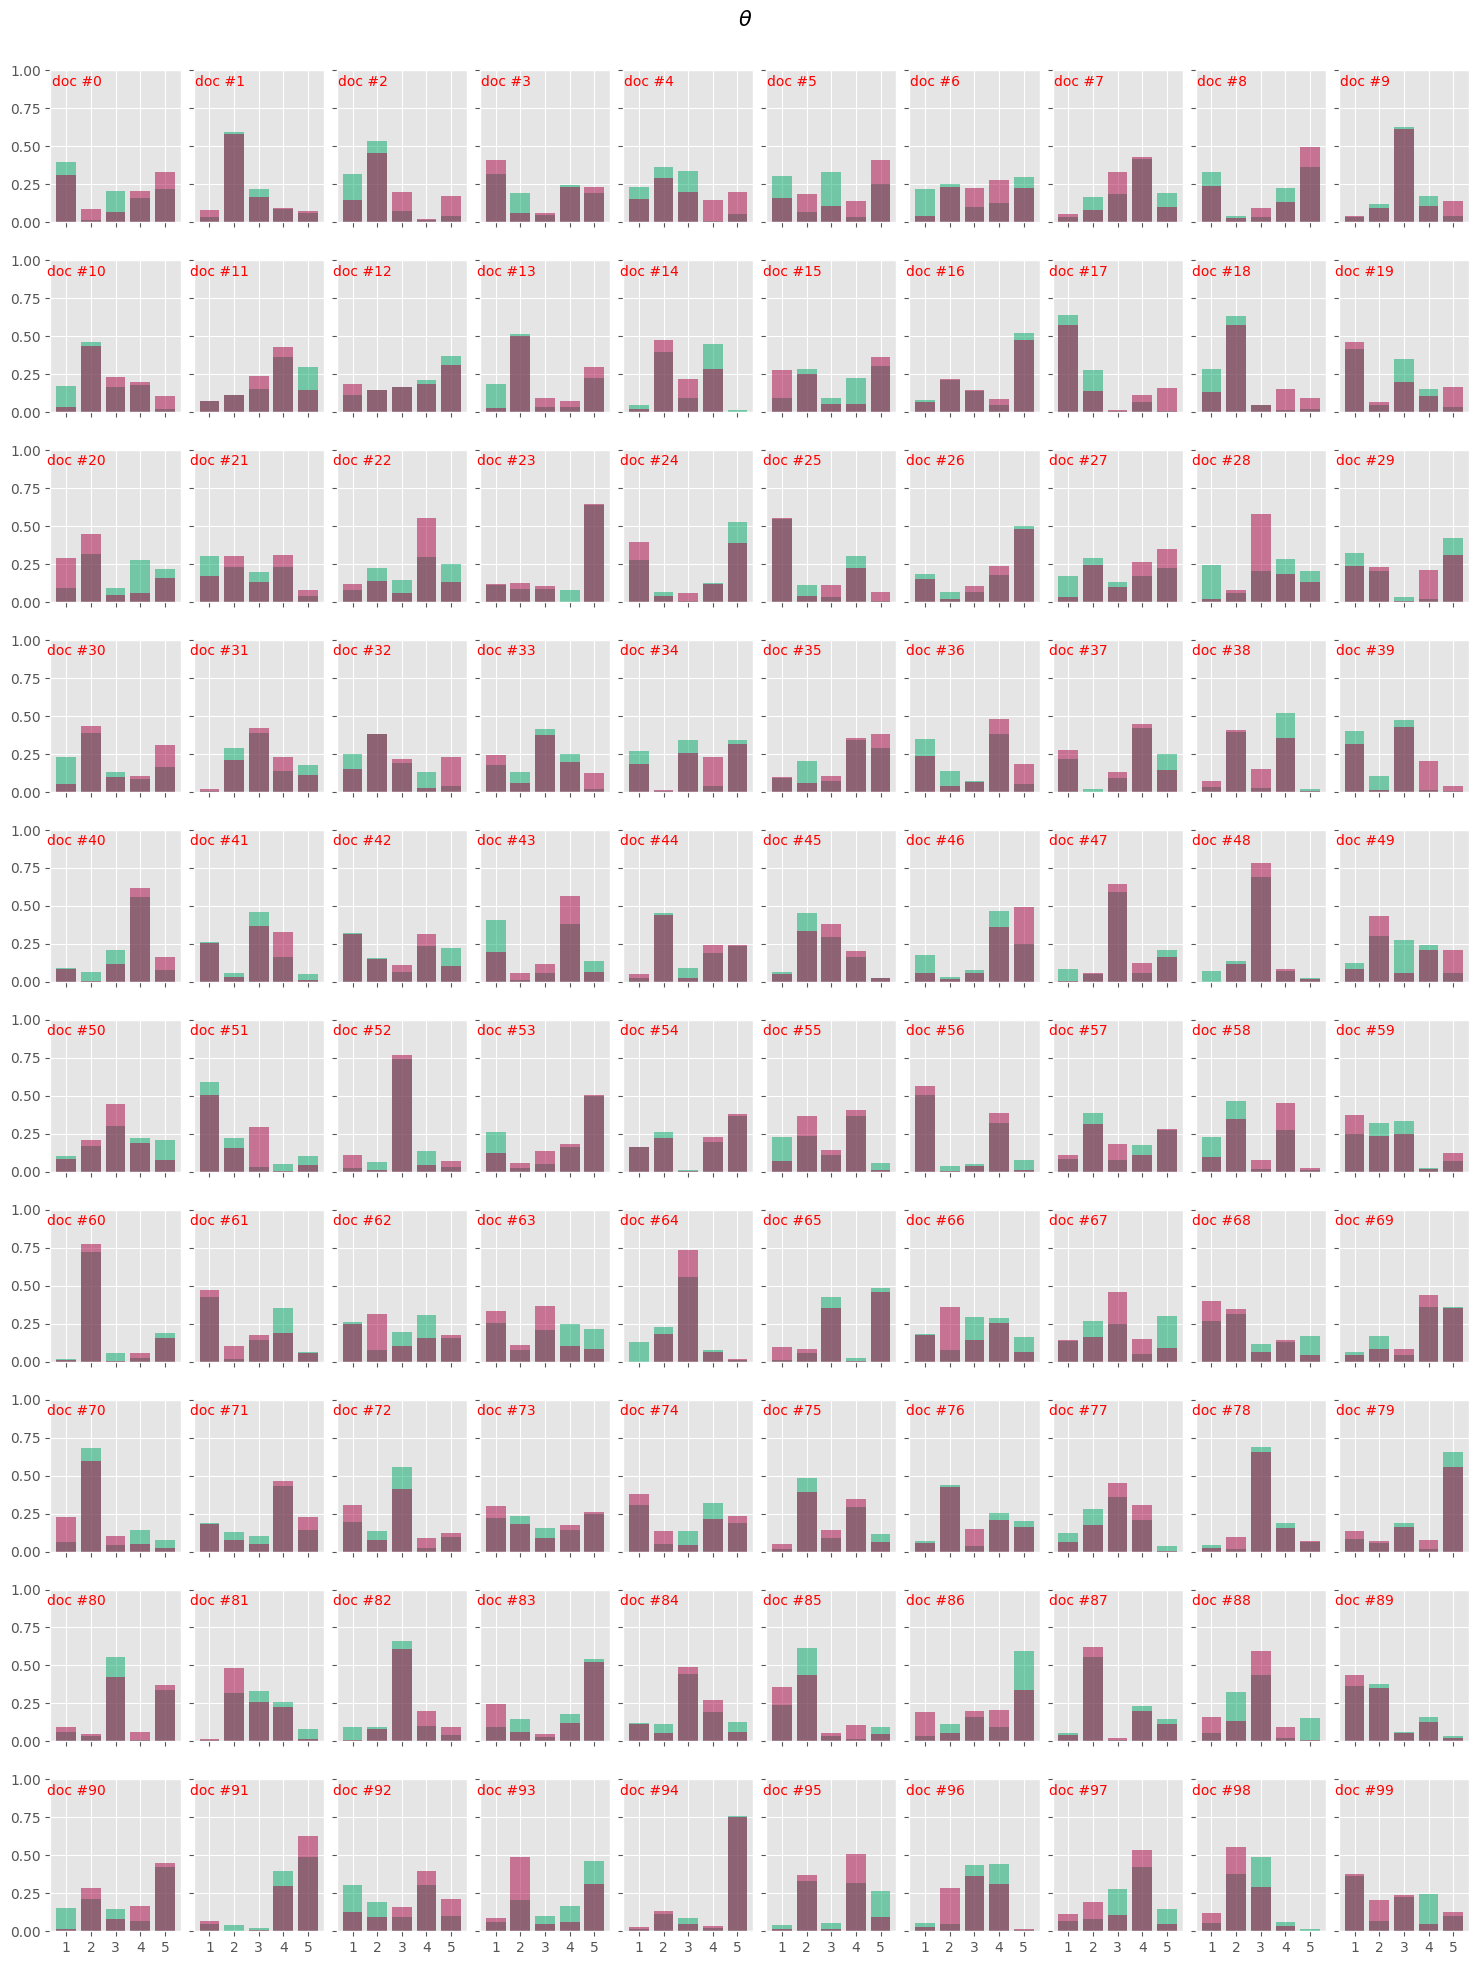

In [13]:
# 真の分布と推定分布の比較（トピック分布）
plot_theta(theta[:100], true_theta[:100], n_rows=10)